In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Apply the default theme
sns.set_theme()
sns.set_style('whitegrid')
sns.set_context('paper')


In [4]:
# Load data
df = pd.read_csv('../data/parallelism.csv')
df_plain_run = pd.read_csv('../data/plain_run.csv')
df_jpeg = pd.read_csv('../data/jpeg.csv')

# _x = parallelism, _y = jpeg, rest = plain run
df_merged = pd.merge(pd.merge(df, df_jpeg, on='file_name'), df_plain_run, on='file_name')

df_merged['time_ratio'] = df_merged['transcoding_time_x'] / df_merged['transcoding_time']

df_merged


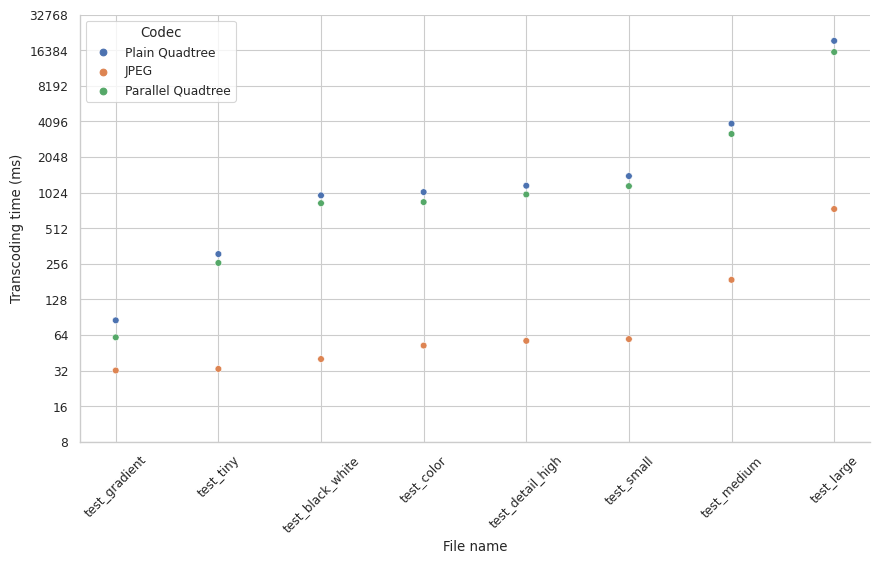

In [3]:
# Transcoding time
df_sorted = df_merged.sort_values('transcoding_time_x')

df_first = df_sorted.loc[:, ('file_name', 'transcoding_time')].rename(
    columns={'transcoding_time': 't'})
df_first['class'] = 'plain_run'

df_second = df_sorted.loc[:, ('file_name', 'transcoding_time_y')].rename(
    columns={'transcoding_time_y': 't'})
df_second['class'] = 'jpeg'

df_third = df_sorted.loc[:, ('file_name', 'transcoding_time_x')].rename(
    columns={'transcoding_time_x': 't'})
df_third['class'] = 'parallelism'

# Concatenate data frames
df_concat = pd.concat([df_first, df_second, df_third])

# Create a visualization
g = sns.relplot(
    x='file_name',
    y='t',
    hue='class',
    data=df_concat,
    aspect=16/9,
    facet_kws={'legend_out': False},
)

legend = g.axes.flat[0].get_legend()
legend.set_title('Codec')
for t, l in zip(legend.texts, ['Plain Quadtree', 'JPEG', 'Parallel Quadtree']):
    t.set_text(l)

ticks = [2**x for x in range(3, 16)]
g.set(xlabel='File name', ylabel='Transcoding time (ms)',
      yscale='log', yticks=ticks, yticklabels=ticks)

plt.xticks(rotation=45)

plt.show()